In [50]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from data_import import import_ppd
from scipy.signal import savgol_filter
from scipy.stats import sem
from scipy.ndimage import uniform_filter1d
import openpyxl 

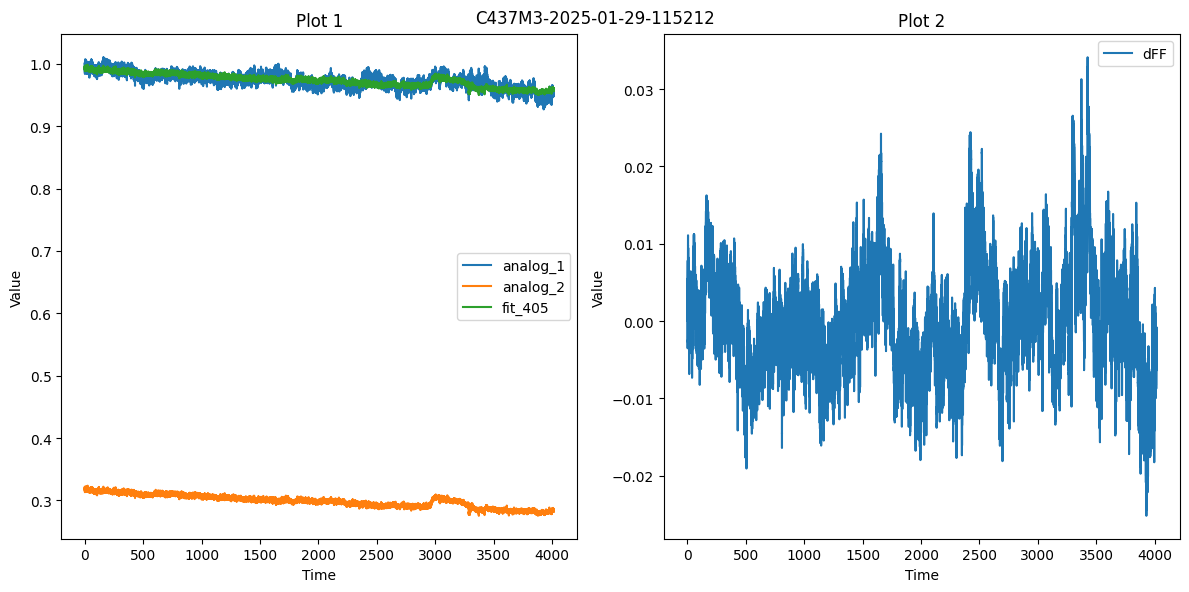

index: (array([  4141,   4186,   7347,   7389,  10096,  10097,  10098,  10139,
        13023,  13024,  13027,  13074,  16262,  16329,  19286,  19287,
        19289,  19341,  22324,  22386,  25162,  25209,  27959,  27960,
        27961,  28018,  31014,  31015,  31016,  31048,  31216,  31257,
        34082,  34127,  36933,  36975,  39944,  39993,  43164,  43207,
        46100,  46141,  49052,  49105,  51947,  52001,  55156,  55204,
        57978,  58039,  61181,  61226,  64532,  64599,  66982,  67027,
        69850,  69897,  72929,  72980,  75897,  75955,  78962,  79007,
        81757,  81799,  85049,  85096,  88092,  88140,  90977,  91025,
        94010,  94053,  96929,  96988,  99857,  99902, 102914, 102954,
       106258, 106305, 109127, 109169, 111837, 111869, 114978, 115027,
       117934, 117982, 121016, 121068, 123939, 124044, 126917, 126966,
       129875, 129925, 132854, 132902, 135799, 135856, 138964, 139006,
       141873, 141910, 144895, 144896, 144899, 144948, 147845, 147909

In [167]:
# Define the PPD file path

#first ACh batch 

# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\SNI\C302M1-2024-07-10-102808.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\SNI\C302M2-2024-07-10-131230.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\SNI\C303M3-2024-07-10-151222.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\SNI\C304M1-2024-07-11-130723.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\SNI\C304M2-2024-07-11-151344.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\SNI\C304M4-2024-07-12-094518.ppd'

# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\sham\C306M1-2024-07-09-123231.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\sham\C306M2-2024-07-09-142324.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\sham\C306M3-2024-07-09-161809.ppd'

# first NA batch

# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\sham\C330M1-2024-07-16-104821.ppd'

# DO NOT RUN ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\SNI\C329M1-b-2024-07-16-150341.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\SNI\C329M1-r-2024-07-16-155737.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\SNI\C331M1-2024-07-11-101812.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\SNI\C331M2-2024-07-12-154023.ppd'

# ACh data sensory stimulation von Frey and temperature round 2

# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C426M1-2024-12-04-133620.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C426M2-2024-12-05-145735.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C426M3-2024-12-06-095120.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C426M4-2024-12-06-113851.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C427M1-2024-12-05-101315.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C427M2-2024-12-04-111838.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C427M3-2024-12-06-142127.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C430M1-2024-12-06-161101.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C430M3-2024-12-06-175236.ppd'

# NA data sensory stimulation von Frey and temperature round 2

# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C429M2-2025-01-28-075425.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C429M3-2025-01-28-104306.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C431M2-2025-01-27-150400.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C431M3-2025-01-28-131144.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C432M2-2025-01-27-090631.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C434M2-2025-01-24-110356.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C434M3-2025-01-24-130707.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C435M2-2025-01-28-145728.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C435M3-2025-01-29-140550.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C436M2-2025-01-27-105523.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C436M3-2025-01-27-130836.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C437M2-2025-01-29-100449.ppd'
ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\C437M3-2025-01-29-115212.ppd'


# Extract the filename without the extension
filename = os.path.splitext(os.path.basename(ppd_file_path))[0]

# Load the data from the CSV file
data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)

# Convert sample index to time vector
time = np.arange(len(data['analog_1'])) / 100                               # consider reanalizing the data because here the denominator was 130 and not 100

# http://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline
reg= np.polyfit(data['analog_2'], data['analog_1'], 1) # ch1 is 465nm, ch2 is 405nm 
fit_405=reg[0]*data['analog_2']+reg[1]
dFF=(data['analog_1']-fit_405)/fit_405 #this gives deltaF/F

#Function to apply smoothing to the data
def smooth_trace(trace, window_size):
    return uniform_filter1d(trace, size=window_size)
dFF = smooth_trace(dFF, 10)

data['fit_405']=fit_405
data['dFF']=dFF

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
ax1.plot(time, data['analog_1'], label='analog_1')
ax1.plot(time, data['analog_2'], label='analog_2')
ax1.plot(time, data['fit_405'], label='fit_405')

# Set plot 1 properties
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Plot 1')
ax1.legend()

# Plot 2
ax2.plot(time, data['dFF'], label='dFF')

# Set plot 2 properties
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title('Plot 2')
ax2.legend()
# changing the plot range
# ax2.set_xlim([1200,1230])
# ax2.set_ylim([-0.02,0.03])

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure title
fig.suptitle(filename)

# Save the figure as PNG with 300 dpi
save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.pdf')
fig.savefig(save_path, format='pdf', dpi=300)

# Display the plots
plt.show()


# Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
index = np.where((np.diff(data['digital_1']) > 0.5) | (np.diff(data['digital_1']) < -0.5))

# Print the onsets and offsets
print("index:", index)

dFF = dFF[index[0][0]:]


In [ ]:
# Load the Excel file
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\SNI\C302M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\SNI\C302M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\SNI\C303M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\SNI\C304M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\SNI\C304M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\SNI\C304M4_log.xlsx'

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\sham\C306M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\sham\C306M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\sham\C306M3_log.xlsx'

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA July 2024\sham\C330M1_log.xlsx'

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA July 2024\SNI\C329M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA July 2024\SNI\C331M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA July 2024\SNI\C331M2_log.xlsx'

# ACh data sensory stimulation von Frey and temperature round 2

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C426M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C426M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C426M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C426M4_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C427M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C427M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C427M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C430M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\ACh_sensory\round_2\C430M3_log.xlsx'

# NA data sensory stimulation von Frey and temperature round 2

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C429M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C429M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C431M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C431M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C432M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C434M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C434M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C435M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C435M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C436M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C436M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C437M2_log.xlsx'
file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\C437M3_log.xlsx'


excel_data = pd.read_excel(file_path)

# Extract the stimulus (Stim) value from the 'Event' column
excel_data['Stim'] = excel_data['Event'].apply(lambda x: int(x.split(':')[0]))


# Subtract 'ledonset' from the 'Frame' column and convert to string
# ledonset = 485 # for mouse C302M1 
# ledonset = 1180 # for mouse C302M2 
# ledonset = 496 # for mouse C303M3
# ledonset = 933 # for mouse C304M1 
# ledonset = 526 # for mouse C304M2 
# ledonset = 2820 # for mouse C304M4

# ledonset = 1446 # for mouse C306M1 
# ledonset = 2023 # for mouse C306M2 
# ledonset = 2351 # for mouse C306M3 

# ledonset = 391 # for mouse C330M1

# ledonset = 1633 # for mouse C329M1
# ledonset = 1056 # for mouse C331M1
# ledonset = 190 # for mouse C331M2

# ACh data sensory stimulation von Frey and temperature round 2

# ledonset = 4291 # for mouse C426M1
# ledonset = 2691 # for mouse C426M2
# ledonset = 1217 # for mouse C426M3
# ledonset = 1281 # for mouse C426M4
# ledonset = 2795 # for mouse C427M1
# ledonset = 3900 # for mouse C427M2
# ledonset = 1617 # for mouse C427M3
# ledonset = 1696 # for mouse C430M1
# ledonset = 1224 # for mouse C430M3

# NA data sensory stimulation von Frey and temperature round 2

# ledonset = 1195 # for mouse C429M2
# ledonset = 1452 # for mouse C429M3
# ledonset = 1489 # for mouse C431M2
# ledonset = 1205 # for mouse C431M3
# ledonset = 1335 # for mouse C432M2
# ledonset = 1541 # for mouse C434M2
# ledonset = 2414 # for mouse C434M3
# ledonset = 1087 # for mouse C435M2
# ledonset = 1347 # for mouse C435M3
# ledonset = 1290 # for mouse C436M2
# ledonset = 1498 # for mouse C436M3
# ledonset = 2071 # for mouse C437M2
ledonset = 1518 # for mouse C437M3


fps = 30
excel_data['Time'] = ((excel_data['Frame'] - ledonset) / fps).astype(str)

# Organize data into a dictionary
data = {
    'Mouse': {
        'Stim': excel_data['Stim'].tolist(),
        'Time': excel_data['Time'].tolist()
    }
}

# Use `data` as needed in your analysis

stim_data = data['Mouse']['Stim']
time_stamps = data['Mouse']['Time']
sampling_rate = 100
fps = 30

pinp_indexes = [i for i, stim in enumerate(stim_data) if stim == 0]
weak_indexes = [i for i, stim in enumerate(stim_data) if stim == 1]
mild_indexes = [i for i, stim in enumerate(stim_data) if stim == 2]
hard_indexes = [i for i, stim in enumerate(stim_data) if stim == 3]
cold_indexes = [i for i, stim in enumerate(stim_data) if stim == 4]
room_indexes = [i for i, stim in enumerate(stim_data) if stim == 5]
warm_indexes = [i for i, stim in enumerate(stim_data) if stim == 6]

pinp_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in pinp_indexes]
weak_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in weak_indexes]
mild_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in mild_indexes]
hard_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in hard_indexes]
cold_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in cold_indexes]
room_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in room_indexes]
warm_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in warm_indexes]


trace_duration = 5  # 5 seconds before and 30 seconds after each data index

# Convert trace duration from seconds to data points
trace_duration_points = trace_duration * sampling_rate

# Function to analyze and plot data for different index sets
def analyze_and_plot(indexes, dFF, sampling_rate, pre_start=5, post_start=20):    # post start indicates how long the plotted trace is going to be
    trace_data_matrix = []

    for index in indexes:
        start = int(index - pre_start * sampling_rate)
        end = int(index + post_start * sampling_rate)
        if start<0 or end>len(dFF): # Skip if trace goes out of bounds
             continue
        trace_data = dFF[start:end]
        time = np.arange(start, end) / sampling_rate

        # Calculate the baseline value
        baseline_start = int(index - 5 * sampling_rate)
        baseline_end = int(index - 3 * sampling_rate)
        baseline = np.mean(dFF[baseline_start:baseline_end])

        # Compute the relative trace data
        relative_trace_data = trace_data - baseline

        # Append relative_trace_data to the matrix
        trace_data_matrix.append(relative_trace_data)


    return np.array(trace_data_matrix)


# Example usage for each data index set
trace_data_matrix_pinp = analyze_and_plot(pinp_data_indexes, dFF, sampling_rate)
trace_data_matrix_weak = analyze_and_plot(weak_data_indexes, dFF, sampling_rate)
trace_data_matrix_mild = analyze_and_plot(mild_data_indexes, dFF, sampling_rate)
trace_data_matrix_hard = analyze_and_plot(hard_data_indexes, dFF, sampling_rate)
trace_data_matrix_cold = analyze_and_plot(cold_data_indexes, dFF, sampling_rate)
trace_data_matrix_room = analyze_and_plot(room_data_indexes, dFF, sampling_rate)
trace_data_matrix_warm = analyze_and_plot(warm_data_indexes, dFF, sampling_rate)

print(trace_data_matrix_pinp)

[[-0.0032158  -0.00331906 -0.00348208 ... -0.00021718 -0.00018703
  -0.00032061]
 [ 0.00460565  0.00459667  0.00434998 ...  0.0041141   0.00448222
   0.00459231]
 [ 0.00065194  0.00095146  0.00098199 ... -0.0161046  -0.01611642
  -0.01596235]
 ...
 [ 0.00369184  0.00364784  0.00388842 ...  0.00037177  0.00055318
   0.00053018]
 [ 0.00186887  0.00179457  0.00164629 ...  0.00184082  0.0020955
   0.00184261]
 [-0.00318233 -0.00328863 -0.00332044 ... -0.00155765 -0.00155791
  -0.0011658 ]]


In [169]:
    
# Create the time vector for the first row
pre_start = 5
post_start = 20
sampling_rate = 100  # Replace with your actual sampling rate
time_vector = np.arange(-pre_start, post_start, 1/sampling_rate)

# Convert trace data to DataFrame and add time vector as the first row

df_pinp= pd.DataFrame(trace_data_matrix_pinp) 
df_weak= pd.DataFrame(trace_data_matrix_weak)
df_mild= pd.DataFrame(trace_data_matrix_mild)
df_hard= pd.DataFrame(trace_data_matrix_hard)
df_cold= pd.DataFrame(trace_data_matrix_cold)
df_room= pd.DataFrame(trace_data_matrix_room)
df_warm= pd.DataFrame(trace_data_matrix_warm)

df_pinp.loc[-1] = time_vector  # Add time vector as the first row
df_pinp.index = df_pinp.index + 1  # Shift index
df_pinp.sort_index(inplace=True)  # Sort index

df_weak.loc[-1] = time_vector  # Add time vector as the first row
df_weak.index = df_weak.index + 1  # Shift index
df_weak.sort_index(inplace=True)  # Sort index

df_mild.loc[-1] = time_vector  # Add time vector as the first row
df_mild.index = df_mild.index + 1  # Shift index
df_mild.sort_index(inplace=True)  # Sort index

df_hard.loc[-1] = time_vector  # Add time vector as the first row
df_hard.index = df_hard.index + 1  # Shift index
df_hard.sort_index(inplace=True)  # Sort index

df_cold.loc[-1] = time_vector  # Add time vector as the first row
df_cold.index = df_cold.index + 1  # Shift index
df_cold.sort_index(inplace=True)  # Sort index

df_room.loc[-1] = time_vector  # Add time vector as the first row
df_room.index = df_room.index + 1  # Shift index
df_room.sort_index(inplace=True)  # Sort index

df_warm.loc[-1] = time_vector  # Add time vector as the first row
df_warm.index = df_warm.index + 1  # Shift index
df_warm.sort_index(inplace=True)  # Sort index

mouse_number="C437M3"
ppd_file_dir = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch'
# Save to Excel
pinp_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_pinp_traces.xlsx')
df_pinp.to_excel(pinp_excel_path, index=False)
weak_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_weak_traces.xlsx')
df_weak.to_excel(weak_excel_path, index=False)
mild_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_mild_traces.xlsx')
df_mild.to_excel(mild_excel_path, index=False)
hard_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_hard_traces.xlsx')
df_hard.to_excel(hard_excel_path, index=False)
cold_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_cold_traces.xlsx')
df_cold.to_excel(cold_excel_path, index=False)
room_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_room_traces.xlsx')
df_room.to_excel(room_excel_path, index=False)
warm_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_warm_traces.xlsx')
df_warm.to_excel(warm_excel_path, index=False)

In [ ]:
""" 
my own failed attempt to write a code converting the data into an excel file


from openpyxl import Workbook
wb = Workbook()
ws_pinp=wb.create_sheet("pinp",0) # creating a worksheet with the name "pinp"
len_pinp=len(trace_data_matrix_pinp)
print(len_pinp)
cnt=0
while (cnt<len_pinp):
    print(trace_data_matrix_pinp[cnt])
    list=trace_data_matrix_pinp.tolist()[cnt]
    ws_pinp.append(list)
    cnt=cnt+1
wb.save(r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\excel_files\C429M2.xlsx') # saving the workbook into an excel file 
"""

12
[-0.00301857 -0.00274874 -0.00279491 ...  0.00261171  0.00236563
  0.00241672]
[ 0.00121594  0.00148099  0.00108359 ... -0.00363166 -0.00343494
 -0.00323781]
[ 0.00053821  0.00060178  0.00059591 ... -0.00536674 -0.00569241
 -0.00539426]
[ 8.34302687e-05  1.73404235e-04  1.40019867e-05 ... -1.85873157e-03
 -1.60070209e-03 -9.66632143e-04]
[-3.64260608e-05 -3.11350767e-04  3.62406477e-05 ...  4.32941326e-03
  4.10770075e-03  3.87115454e-03]
[0.0007126  0.00016942 0.00022209 ... 0.00086449 0.00058621 0.00021756]
[-0.00298703 -0.00282035 -0.00318972 ...  0.00857993  0.0092356
  0.00973794]
[-0.00527117 -0.00538364 -0.00495437 ...  0.00885788  0.0084511
  0.00825944]
[0.00219004 0.00218881 0.00239521 ... 0.00091133 0.0009743  0.00070781]
[ 0.00075048  0.00114633  0.00081438 ... -0.00390997 -0.00396126
 -0.00388571]
[-0.00112462 -0.00130794 -0.00148048 ... -0.00502987 -0.00535456
 -0.00529082]
[0.00203633 0.00185717 0.00169342 ... 0.0035506  0.00364044 0.0033602 ]
